<a href="https://colab.research.google.com/github/nhn09/DeepLearning/blob/main/DarkTriad_v4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install keras


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from tqdm import tqdm
from sklearn.model_selection import train_test_split
import tensorflow as tf
from keras.models import Sequential
from keras.layers import LSTM, GRU,SimpleRNN
from keras.layers.core import Dense, Activation, Dropout
from keras.layers import Embedding
from tensorflow.keras.layers import BatchNormalization
from keras.utils import np_utils
from sklearn import preprocessing, decomposition, model_selection, metrics, pipeline
from keras.layers import GlobalMaxPooling1D, Conv1D, MaxPooling1D, Flatten, Bidirectional, SpatialDropout1D
from keras.preprocessing import sequence, text
from keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from plotly import graph_objs as go
import plotly.express as px
import plotly.figure_factory as ff

In [ ]:
!gdown --id 159rqMvDyWc3w2bvpQ2cD0XGvr3U3QUUQ

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=159rqMvDyWc3w2bvpQ2cD0XGvr3U3QUUQ
To: /content/postwithScore.csv
100% 1.90M/1.90M [00:00<00:00, 158MB/s]


In [ ]:
rawDataset = pd.read_csv('/content/postwithScore.csv', delimiter = ",")
rawDataset.info

#drop all rows with undefined post
rawDataset = rawDataset.drop(rawDataset[rawDataset['post '] =='undefined'].index).reset_index()

In [ ]:
rawDataset.info

<bound method DataFrame.info of       index  Unnamed: 0                                              post   \
0         0           0                              my heart my soul..T-T   
1         2           2              Free speech is a joke in this country   
2         5           5  Make 500 sequels I don't care.Make another Jus...   
3         6           6  Everybody wants a piece of the politically cor...   
4        10          10                    And that's how a movement dies.   
...     ...         ...                                                ...   
8722  12745       12745                    TWO SUPERHUMANS IN ONE FRAME <3   
8723  12746       12746  Man!!!\nThe chase- UNBELIEVABLE!! Mushi and Ri...   
8724  12748       12748                                              <3 <3   
8725  12749       12749                               Madrid Triumphs!! :D   
8726  12750       12750                  A small piece of heaven on earth.   

      Mach  LSRP12  LSRP2  NRSM

In [ ]:
rawDataset_0_999 = rawDataset.iloc[0:1000,:]

In [ ]:
rawDataset_0_999.info

<bound method DataFrame.info of      index  Unnamed: 0                                              post   \
0        0           0                              my heart my soul..T-T   
1        2           2              Free speech is a joke in this country   
2        5           5  Make 500 sequels I don't care.Make another Jus...   
3        6           6  Everybody wants a piece of the politically cor...   
4       10          10                    And that's how a movement dies.   
..     ...         ...                                                ...   
995   1421        1421                                             LOL :v   
996   1422        1422                                        oh..okay :s   
997   1423        1423   Marvel's Legion is gonna be the next best thing.   
998   1424        1424                                       way to go :3   
999   1426        1426                                                LOL   

     Mach  LSRP12  LSRP2  NRSM  
0    68.0 

In [ ]:
#emoji to text 

In [ ]:
rawDataset_0_999['post '][0:10]

0                                my heart my soul..T-T
1                Free speech is a joke in this country
2    Make 500 sequels I don't care.Make another Jus...
3    Everybody wants a piece of the politically cor...
4                      And that's how a movement dies.
5                   হুম আর কি কি হচ্ছে একটা লিস্ট করি?
6    France won the world cup\nCroatia won our hear...
7                        Underdogs all the way boiiiii
8    *Gets beaten by two teams who reached the finals*
9    yes please do post one more "Its coming home.....
Name: post , dtype: object

In [ ]:
!pip install langdetect
from langdetect import detect
def detect_my(text):
   try:
       return detect(text)
   except:
       return 'unknown'

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 981 kB 14.0 MB/s 
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993242 sha256=4728342f3436d15d893308f6e4776d1ea028bddf85d8e5d321306faa0025a322
  Stored in directory: /root/.cache/pip/wheels/c5/96/8a/f90c59ed25d75e50a8c10a1b1c2d4c402e4dacfa87f3aff36a
Successfully built langdetect


In [ ]:
def convert(text):
   try:
     if(text!='en' and text!='bn'):
       return 'other'
     else:
      return text
   except:
       return text

In [ ]:
rawDataset['language'] = rawDataset['post '].apply(detect_my)
rawDataset['languages'] = rawDataset['language'].apply(convert)

In [ ]:
englishDataset = rawDataset[rawDataset['languages'] == 'en']


In [ ]:
englishDataset.info

<bound method DataFrame.info of       index  Unnamed: 0                                              posts  \
0         0           0                              my heart my soul..T-T   
1         2           2              Free speech is a joke in this country   
2         5           5  Make 500 sequels I don't care.Make another Jus...   
3         6           6  Everybody wants a piece of the politically cor...   
4        10          10                    And that's how a movement dies.   
...     ...         ...                                                ...   
8720  12743       12743  This broke my heart... May the departed soul r...   
8721  12744       12744  :( First Massive crash with Bangladeshi passen...   
8722  12745       12745                    TWO SUPERHUMANS IN ONE FRAME <3   
8723  12746       12746  Man!!!\nThe chase- UNBELIEVABLE!! Mushi and Ri...   
8726  12750       12750                  A small piece of heaven on earth.   

      Mach  LSRP12  LSRP2  NRSM

In [ ]:
englishDataset.drop(['language'],axis=1,inplace=True)
englishDataset.rename(columns = {'post ':'posts'}, inplace = True)
englishDataset.to_csv('EnglishDataset.csv', sep=',')

In [ ]:
engDataset = pd.read_csv('/content/EnglishDataset.csv', delimiter = ",")
engDataset.loc[engDataset.Mach <=60 , "Mach"] = 0
engDataset.loc[engDataset.Mach > 0, "Mach"] = 1
engDataset.to_csv('EnglishMedianSplitMach.csv', sep=',')

In [ ]:
englishDataset['posts'][14:15]

17    কালাই রুটি with the best company at rajsahi!
Name: posts, dtype: object

In [ ]:
#find max len 

all_numbers = englishDataset['posts'].apply(lambda text:len(str(text).split()))
max_comment_len = all_numbers.max()
print(max_comment_len)

4587


Train test val split

In [ ]:
x, xtest, y, ytest = train_test_split(engDataset.posts.values, engDataset.Mach.values,
                                                  stratify= engDataset.Mach.values, 
                                                  random_state=42, 
                                                  test_size=0.4, shuffle=True)

xtrain, xvalid, ytrain, yvalid = train_test_split(x, y,
                                                  stratify=y, 
                                                  random_state=42, 
                                                  test_size=0.2, shuffle=True)

Tokeniser

In [ ]:
from keras.utils import pad_sequences

In [ ]:
token = text.Tokenizer(num_words=None)

token.fit_on_texts(list(xtrain) + list(xvalid))
xtrain_seq = token.texts_to_sequences(xtrain)
xvalid_seq = token.texts_to_sequences(xvalid)

#zero pad the sequences
xtrain_pad = pad_sequences(xtrain_seq, maxlen=max_comment_len)
xvalid_pad = pad_sequences(xvalid_seq, maxlen=max_comment_len)

word_index = token.word_index

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(len(word_index) + 1,200,input_length=max_comment_len),
    tf.keras.layers.SimpleRNN(32),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_7 (Embedding)     (None, 4587, 200)         1880000   
                                                                 
 simple_rnn_7 (SimpleRNN)    (None, 32)                7456      
                                                                 
 dense_14 (Dense)            (None, 10)                330       
                                                                 
 dense_15 (Dense)            (None, 1)                 11        
                                                                 
Total params: 1,887,797
Trainable params: 1,887,797
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
num_epochs=5
history=model.fit(xtrain_pad, ytrain, epochs=num_epochs, validation_data = (xvalid_pad, yvalid))

Epoch 1/5
68/68 [==============================] - 219s 3s/step - loss: 0.6198 - accuracy: 0.6782 - val_loss: 0.6054 - val_accuracy: 0.7035
Epoch 2/5
68/68 [==============================] - 221s 3s/step - loss: 0.4291 - accuracy: 0.8165 - val_loss: 0.6246 - val_accuracy: 0.6667
Epoch 3/5
68/68 [==============================] - 229s 3s/step - loss: 0.1950 - accuracy: 0.9451 - val_loss: 0.7121 - val_accuracy: 0.6427
Epoch 4/5
68/68 [==============================] - 221s 3s/step - loss: 0.0642 - accuracy: 0.9876 - val_loss: 0.8294 - val_accuracy: 0.6096
Epoch 5/5
68/68 [==============================] - 222s 3s/step - loss: 0.0272 - accuracy: 0.9949 - val_loss: 0.9216 - val_accuracy: 0.5985


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


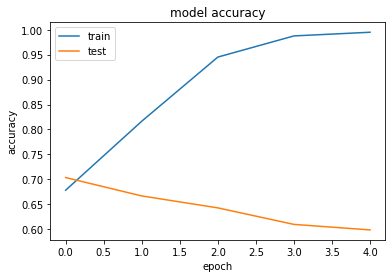

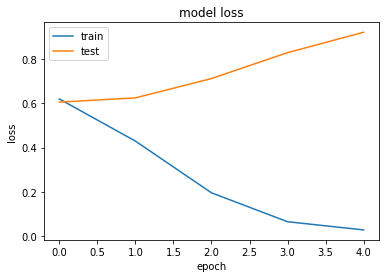

In [ ]:
print(history.history.keys())
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()